In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import textwrap
import math
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
#Parameterwahl

# Anzahl der Karten pro Blatt
anzahl_karten_horizont = 4
anzahl_karten_vertikal = 4

#Schriftgrößen
font_titel = 12 
font_text = 8
font_type = 6

#Breite für Zeilenumbrüche
width_titel = 16
width_text = 30

#Definierter Standartabstand
spacing = 5

#Dateiname
csv_name = 'DnC Card Table - cards.csv'

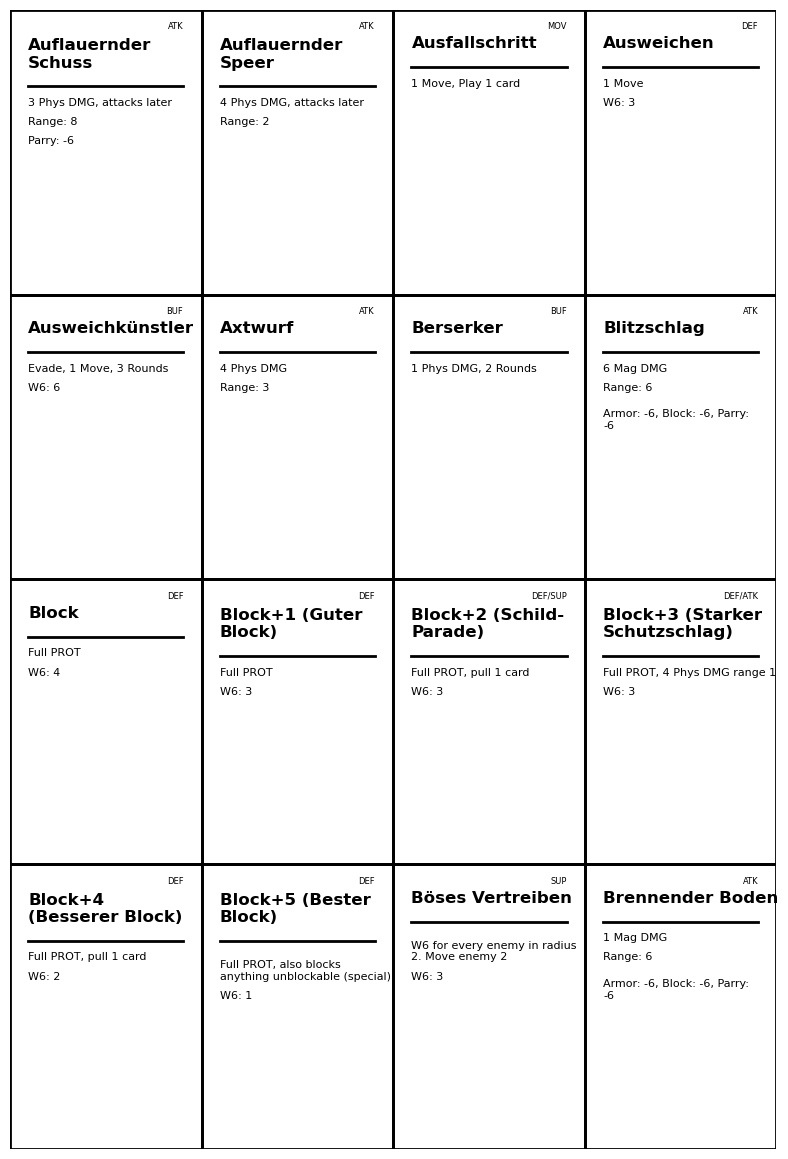

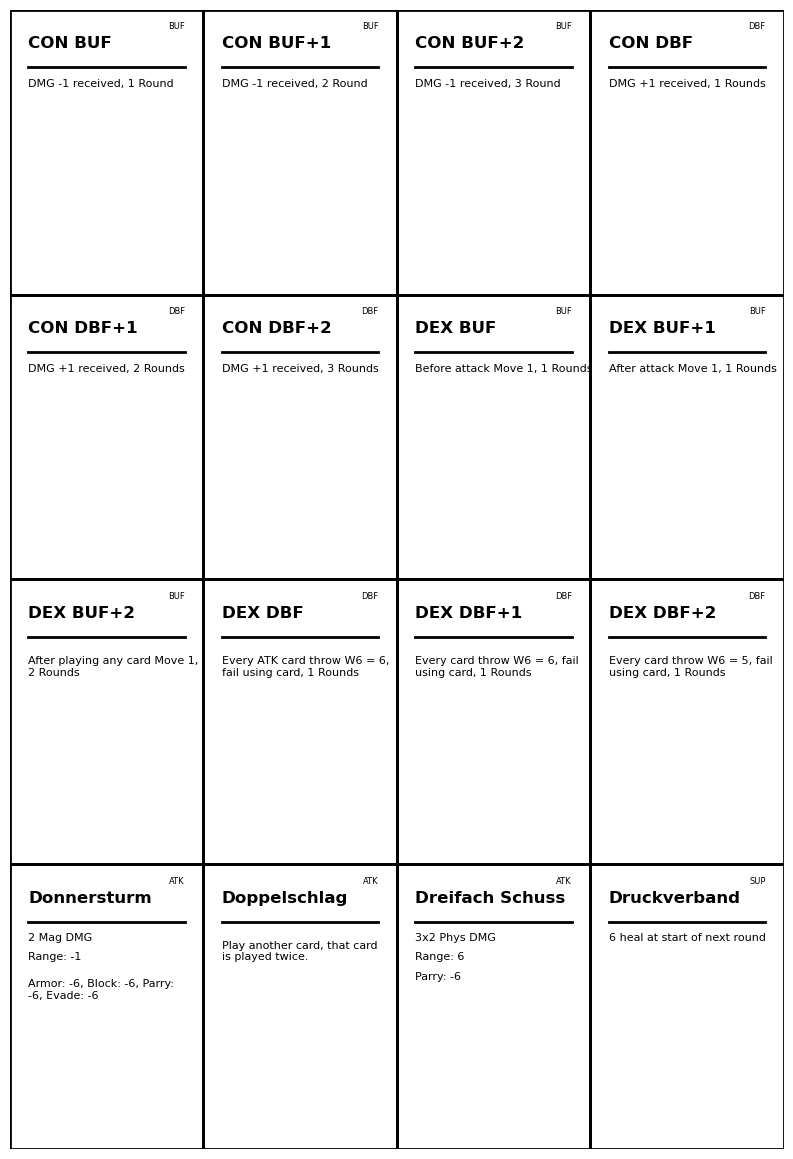

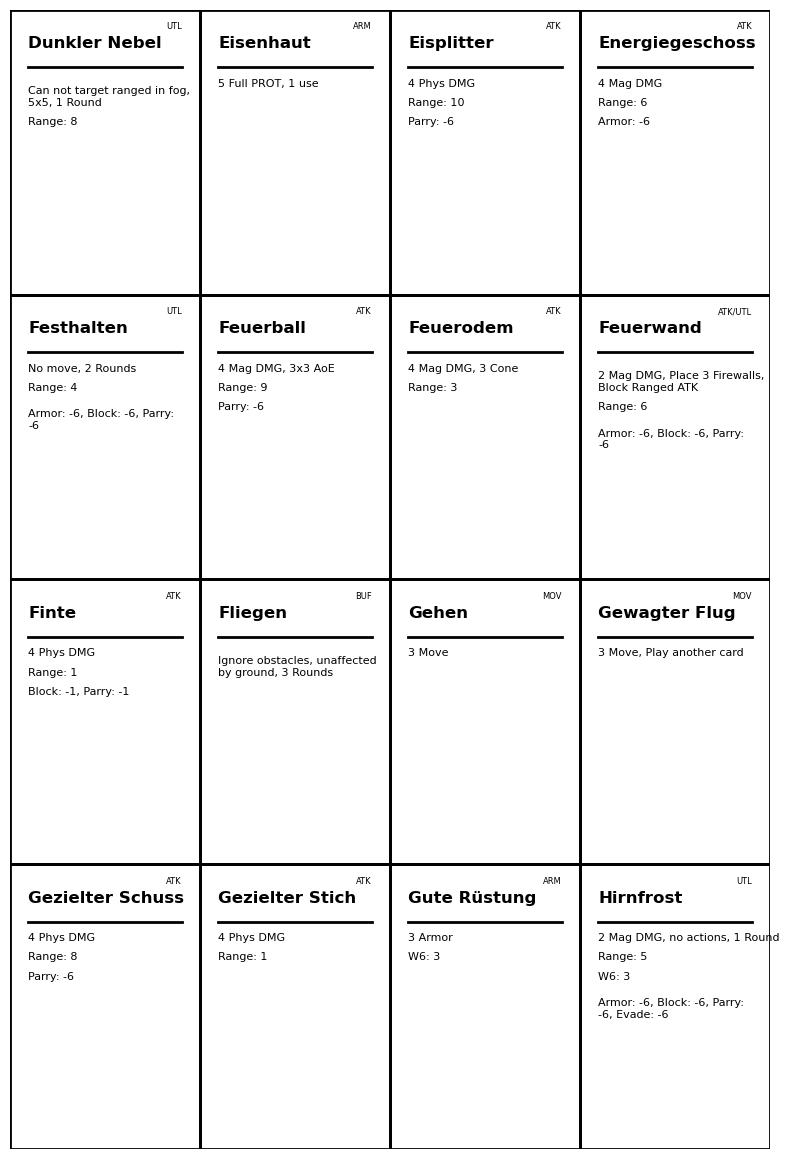

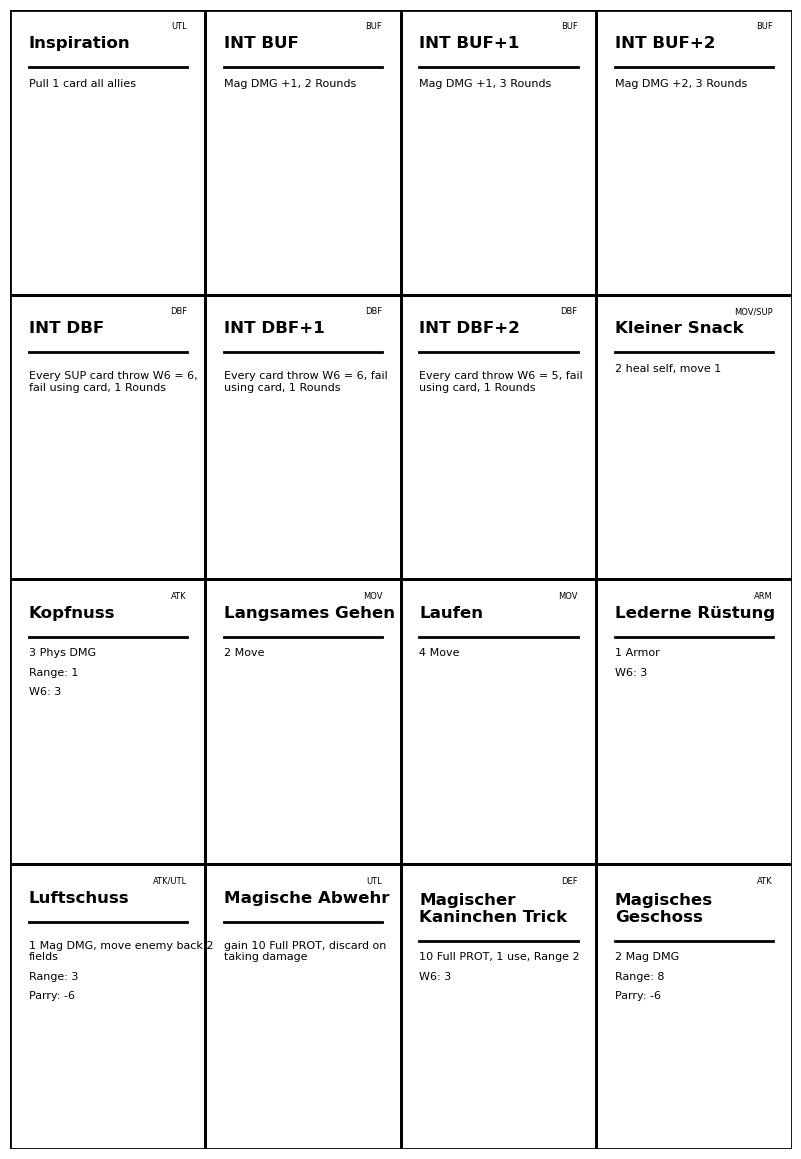

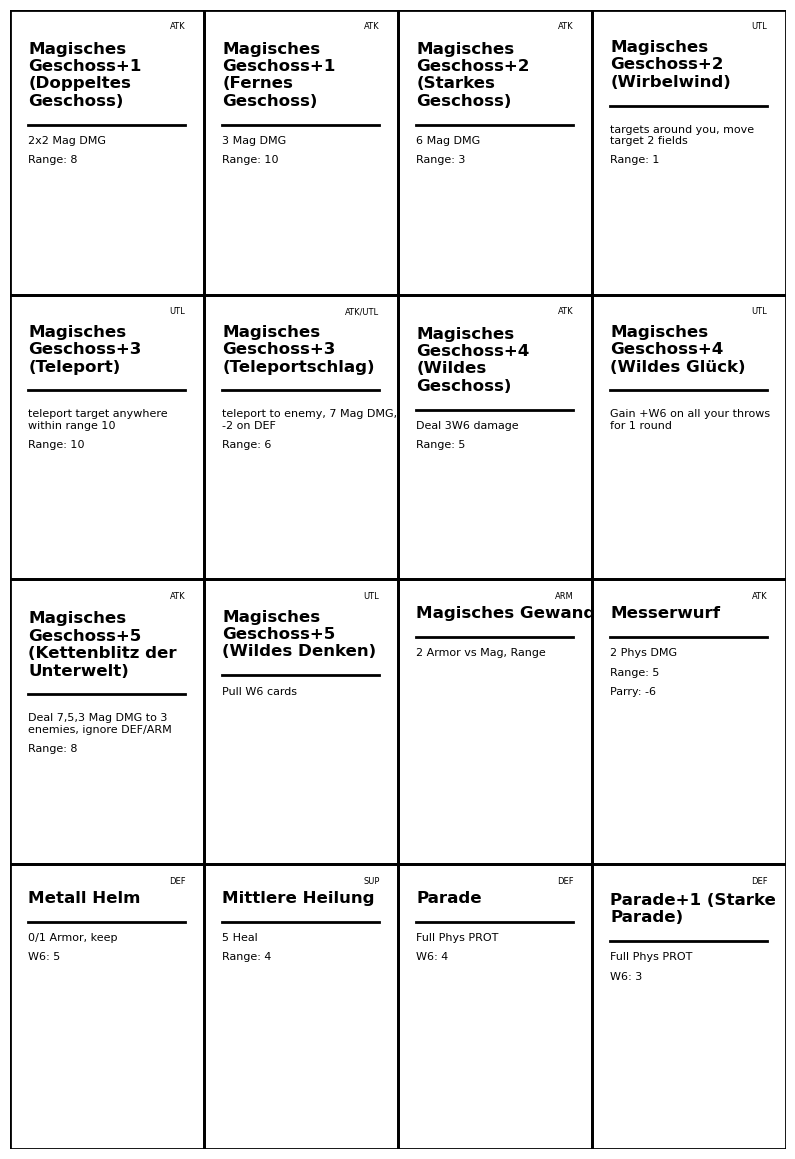

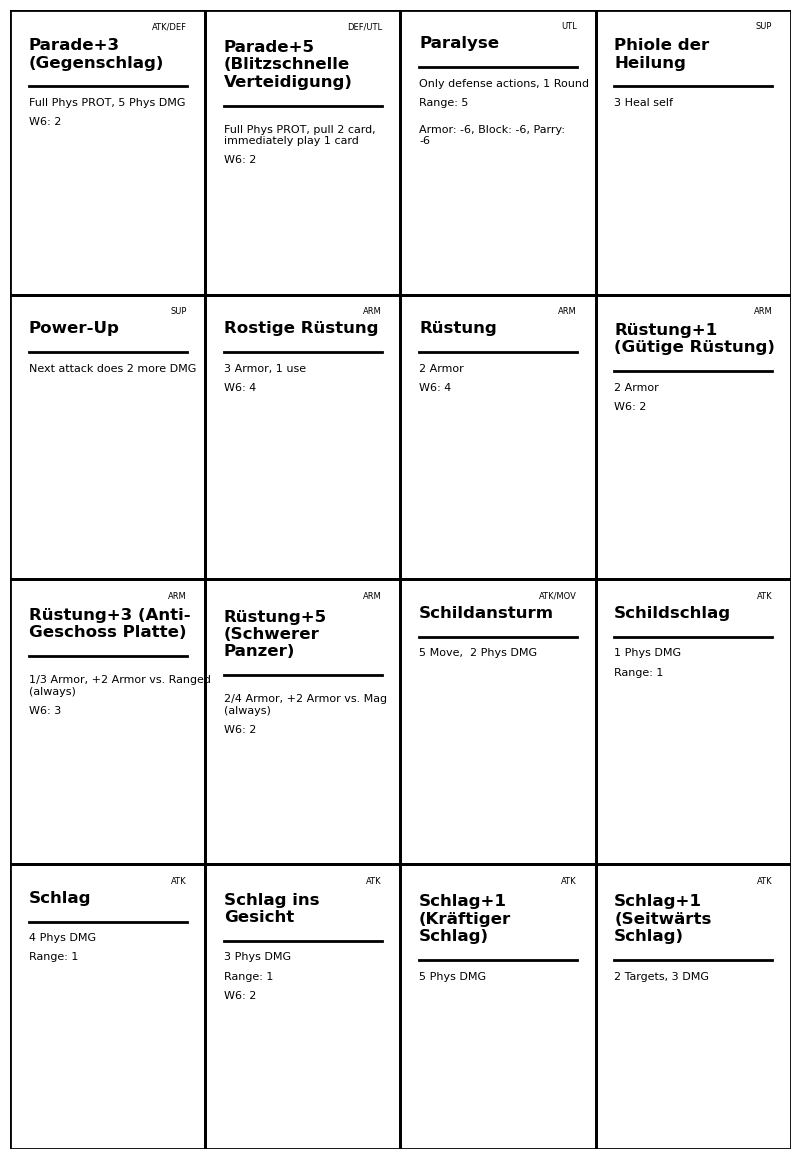

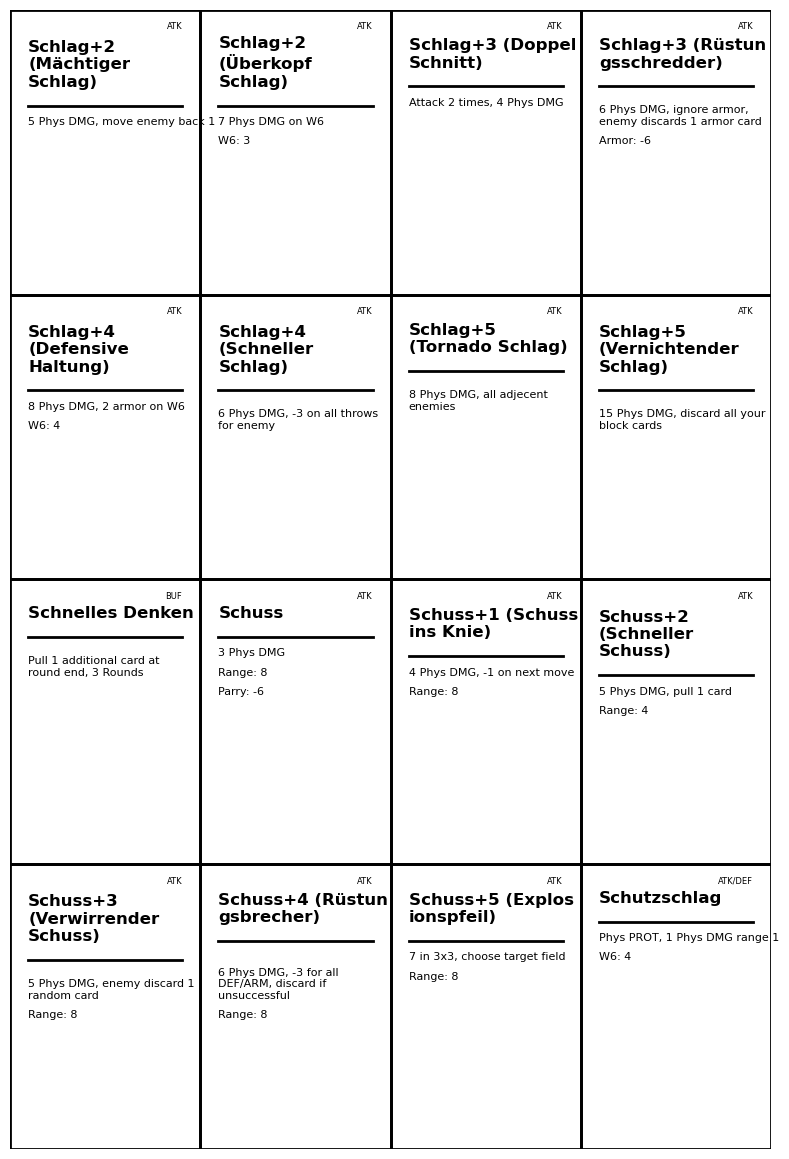

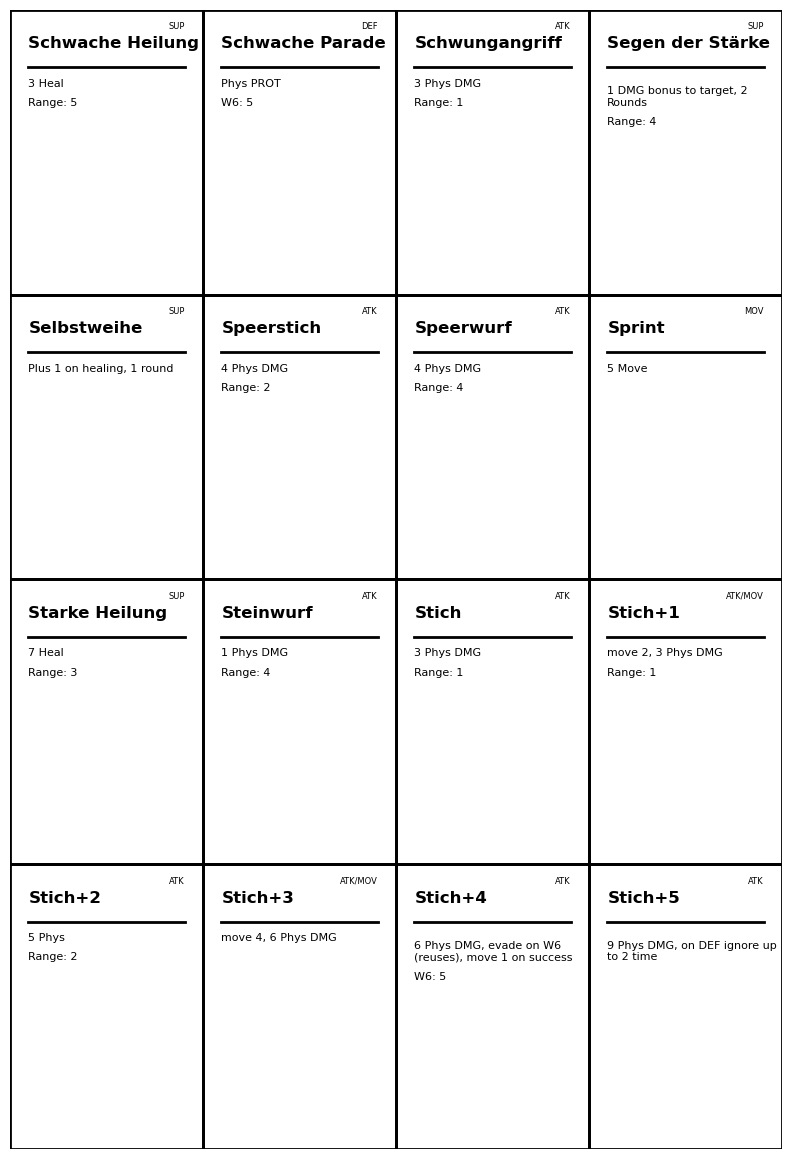

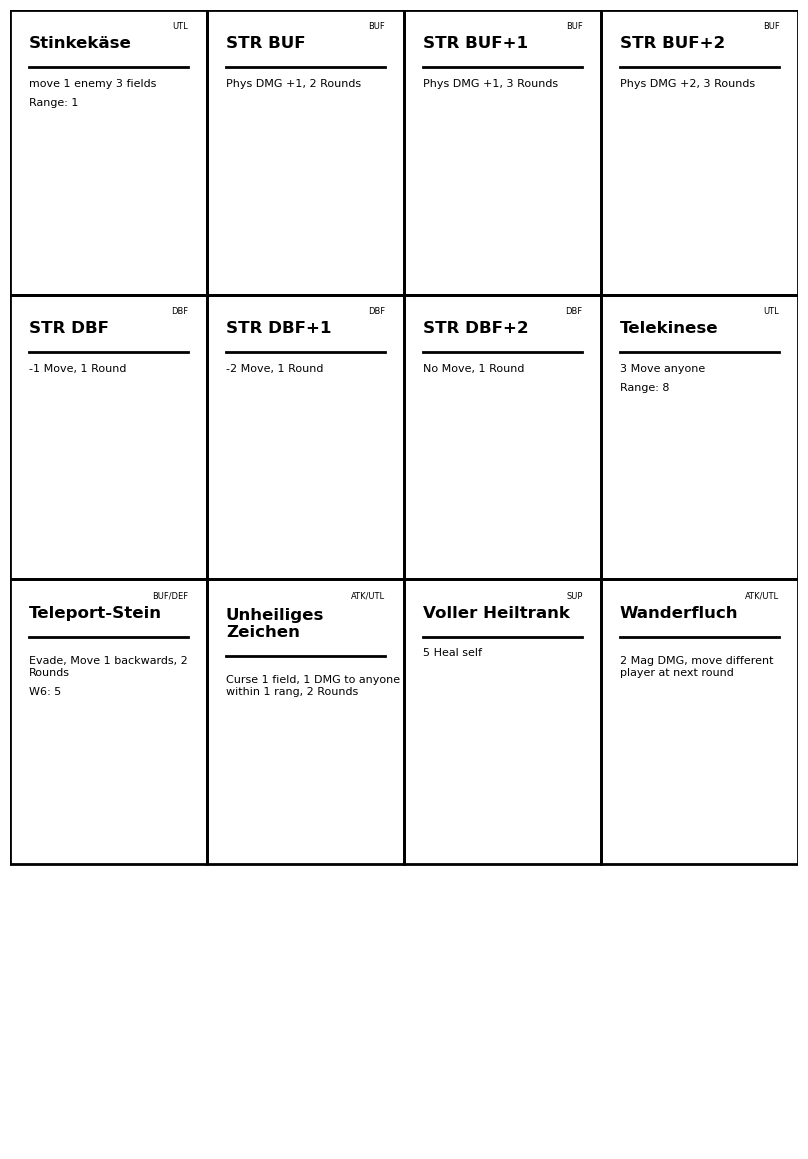

In [4]:
#printen der Zeichnung (zum Abgleich ob es so aussieht, wie man wollte)

df = pd.read_csv(csv_name)

# Größe eines DIN A4 Blattes in mm
breite_A4 = 210 
höhe_A4 = 297   

# Berechnung der Kartengröße
karte_breite = breite_A4 / anzahl_karten_horizont
karte_höhe = höhe_A4 / anzahl_karten_vertikal

# Anzahl der Karten pro Seite
karten_pro_seite = anzahl_karten_horizont * anzahl_karten_vertikal

# Hilfsfunktion zum Zeichnen einer Karte
def zeichne_karte(ax, x, y, row):
    text_y_pos = y + karte_höhe - (2 * spacing)  # Startpunkt für den Text, oben in der Karte
    
    # Name fett oben
    name_text = textwrap.fill(row['Card Name'], width=width_titel)  # Breite dynamisch anpassen
    num_name_lines = name_text.count("\n") + 1  # Anzahl der Textzeilen
    text_y_pos -= spacing * (num_name_lines-1)
    ax.text(x + spacing, text_y_pos, name_text, fontsize=font_titel, weight='bold', ha='left')
    text_y_pos -= spacing
    
    # Type oben rechts
    ax.text(x + karte_breite - spacing, y + karte_höhe - spacing, row['Type'], fontsize=font_type, ha='right')
    
    # Waagerechter Strich als Trennlinie
    ax.plot([x + spacing, x + karte_breite - spacing], [text_y_pos, text_y_pos], color='black', lw=2)
    text_y_pos -= spacing  # Platz für die Trennlinie
    
    # Effect weiter unten, Zeilenumbruch an geeigneter Stelle
    effect_text = textwrap.fill(row['Effect'], width=width_text)  # Breite dynamisch anpassen
    num_effect_lines = effect_text.count("\n") + 1  # Anzahl der Textzeilen
    text_y_pos -= spacing * (num_effect_lines-1)
    ax.text(x + spacing, text_y_pos, effect_text, fontsize=font_text, ha='left')
    text_y_pos -= spacing

    # Range (falls vorhanden)
    if not pd.isna(row['Range']):
        ax.text(x + spacing, text_y_pos, f"Range: {int(row['Range'])}", fontsize=font_text, ha='left')
        text_y_pos -= spacing  # Platz für Range
    
    # W6 (falls vorhanden)
    if not pd.isna(row['W6']):
        ax.text(x + spacing, text_y_pos, f"W6: {int(row['W6'])}", fontsize=font_text, ha='left')
        text_y_pos -= spacing  # Platz für W6
    
    # Armor, Block, Parry, Evade (falls vorhanden)
    attributes = []
    if not pd.isna(row['Armor']):
        attributes.append(f"Armor: {int(row['Armor'])}")
    if not pd.isna(row['Block']):
        attributes.append(f"Block: {int(row['Block'])}")
    if not pd.isna(row['Parry']):
        attributes.append(f"Parry: {int(row['Parry'])}")
    if not pd.isna(row['Evade']):
        attributes.append(f"Evade: {int(row['Evade'])}")
    
    if attributes:
        attributes_text = ", ".join(attributes)
        attributes_text_wrapped = textwrap.fill(attributes_text, width=width_text)
        num_attributes_lines = attributes_text_wrapped.count("\n") + 1  # Anzahl der Zeilen
        text_y_pos -= spacing * (num_attributes_lines-1)
        ax.text(x + spacing, text_y_pos, attributes_text_wrapped, fontsize=font_text, ha='left')
        text_y_pos -= spacing

# Anzahl der Seiten berechnen
anzahl_seiten = (len(df) + karten_pro_seite - 1) // karten_pro_seite  # Rundet nach oben

# Karten auf mehreren Seiten zeichnen
for seite in range(anzahl_seiten):
    fig, ax = plt.subplots(figsize=(breite_A4 / 25.4, höhe_A4 / 25.4))  # Konvertiere mm in Zoll
    ax.set_xlim(0, breite_A4)
    ax.set_ylim(0, höhe_A4)
    ax.axis('off')  # Achsen ausblenden
    
    # Zeichne Karten für diese Seite
    for karten_index in range(karten_pro_seite):
        global_index = seite * karten_pro_seite + karten_index
        
        # Stoppe, wenn alle Karten gezeichnet wurden
        if global_index >= len(df):
            break
        
        row = df.iloc[global_index]
        
        # Berechne die Position der Karte
        i = karten_index % anzahl_karten_horizont
        j = karten_index // anzahl_karten_horizont
        x = i * karte_breite
        y = (anzahl_karten_vertikal - j - 1) * karte_höhe  # Y umgekehrt wegen des Koordinatensystems
        
        # Zeichne eine Karte (Rechteck)
        rect = patches.Rectangle((x, y), karte_breite, karte_höhe, edgecolor='black', facecolor='none', lw=2)
        ax.add_patch(rect)  # Rechteck sichtbar machen
        
        # Zeichne die Inhalte der Karte
        zeichne_karte(ax, x, y, row)
    fig.tight_layout()
    # Anzeigen der resultierenden Grafik
    plt.show()

In [5]:
# Erstellen einer PDF-Datei
with PdfPages('karten.pdf') as pdf_pages:
    # Karten auf mehreren Seiten zeichnen
    for seite in range(anzahl_seiten):
        fig, ax = plt.subplots(figsize=(breite_A4 / 25.4, höhe_A4 / 25.4))  # Konvertiere mm in Zoll
        ax.set_xlim(0, breite_A4)
        ax.set_ylim(0, höhe_A4)
        ax.axis('off')  # Achsen ausblenden
        
        # Zeichne Karten für diese Seite
        for karten_index in range(karten_pro_seite):
            global_index = seite * karten_pro_seite + karten_index
            
            # Stoppe, wenn alle Karten gezeichnet wurden
            if global_index >= len(df):
                break
            
            row = df.iloc[global_index]
            
            # Berechne die Position der Karte
            i = karten_index % anzahl_karten_horizont
            j = karten_index // anzahl_karten_horizont
            x = i * karte_breite
            y = (anzahl_karten_vertikal - j - 1) * karte_höhe  # Y umgekehrt wegen des Koordinatensystems
            
            # Zeichne eine Karte (Rechteck)
            rect = patches.Rectangle((x, y), karte_breite, karte_höhe, edgecolor='black', facecolor='none', lw=2)
            ax.add_patch(rect)  # Rechteck sichtbar machen
            
            # Zeichne die Inhalte der Karte
            zeichne_karte(ax, x, y, row)
        
        # Seite zu PDF hinzufügen
        fig.tight_layout()
        pdf_pages.savefig(fig, bbox_inches='tight')
        plt.close(fig)

    print("PDF erfolgreich erstellt.")

PDF erfolgreich erstellt.
